In [ ]:
! pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1EvGiLEtVh50xcr9OEOrcYZX_JFe9iDZX'
output = 'tweet_emotions.csv.zip'

gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EvGiLEtVh50xcr9OEOrcYZX_JFe9iDZX
To: /content/tweet_emotions.csv.zip
100%|██████████| 1.63M/1.63M [00:00<00:00, 130MB/s]


'tweet_emotions.csv.zip'

In [ ]:
! unzip tweet_emotions.csv.zip

Archive:  tweet_emotions.csv.zip
  inflating: tweet_emotions.csv      


In [ ]:
import pandas as pd
df = pd.read_csv('tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! pip install neattext

     |████████████████████████████████| 114 kB 15.6 MB/s 


In [ ]:
import neattext.functions as nfx

In [ ]:
#Load Data
#df = pd.read_csv('emotion-detection-from-text/tweet_emotions.csv')

In [ ]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df1 = df[df['sentiment'] == 'sadness']

In [ ]:
df1

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?
...,...,...,...
39882,1753887579,sadness,Heaps keen for next weekend. Mummy. &lt;3
39894,1753902385,sadness,@renagades Have a great day..... if the rain k...
39909,1753902771,sadness,@Ssisch Hmmm... Sisch &amp; sound design. So w...
39939,1753903509,sadness,@watermelon39 haha! And Twitter! Hard though i...


In [ ]:
df1.shape

(5165, 3)

In [ ]:
(df1['tweet_id'] == 1956967666).value_counts()

False    5164
True        1
Name: tweet_id, dtype: int64

In [ ]:
df.shape

(40000, 3)

In [ ]:
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [ ]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment= blob.sentiment.polarity
  if sentiment>0:
    result = "Positive"
  elif sentiment<0:
    result = "Negative"
  else:
    result = "Neutral"
  return result 

In [ ]:
#test function
result = get_sentiment("I love coding")
result2 = get_sentiment("Im happy")
result3 = get_sentiment("Im sad")
print(result)
print(result2)
print(result3)

Positive
Positive
Negative


In [ ]:
df['result'] = df['content'].apply(get_sentiment)

In [ ]:
df.head()

,tweet_id,sentiment,content,result
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [ ]:
size = df.groupby(['sentiment','result']).size()

In [ ]:
size

sentiment   result  
anger       Negative      34
            Neutral       41
            Positive      35
boredom     Negative      80
            Neutral       56
            Positive      43
empty       Negative     168
            Neutral      418
            Positive     241
enthusiasm  Negative     100
            Neutral      254
            Positive     405
fun         Negative     205
            Neutral      474
            Positive    1097
happiness   Negative     345
            Neutral     1224
            Positive    3640
hate        Negative     694
            Neutral      364
            Positive     265
love        Negative     214
            Neutral      684
            Positive    2944
neutral     Negative    1156
            Neutral     4442
            Positive    3040
relief      Negative     207
            Neutral      477
            Positive     842
sadness     Negative    1886
            Neutral     1696
            Positive    1583
surprise    Negative  

In [ ]:
#df['size'] = df.groupby(['sentiment','result']).[transform('size')
df['size'] = df.groupby(['sentiment', 'result'])['sentiment'].transform('size')

In [ ]:
grouped_df = df.groupby( [ "sentiment", "result"] )

grouped = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
idx = grouped.groupby(['sentiment'])['Group_Count'].transform(max) == grouped['Group_Count']
new_df = grouped[idx]

In [ ]:
mergedStuff = pd.merge(df, new_df, on=['sentiment'], how='left')

In [ ]:
mergedStuff = mergedStuff.loc[mergedStuff.result_y != "Neutral"]
mergedStuff

,tweet_id,sentiment,content,result_x,size,result_y,Group_Count
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral,1696,Negative,1886
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,1696,Negative,1886
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,405,Positive,405
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",Positive,1583,Negative,1886
8,1956969035,sadness,@charviray Charlene my love. I miss you,Positive,1583,Negative,1886
...,...,...,...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,Neutral,1224,Positive,3640
39996,1753919001,love,Happy Mothers Day All my love,Positive,2944,Positive,2944
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive,2944,Positive,2944
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,Positive,3640,Positive,3640


In [ ]:
final_df= mergedStuff[["result_y","content"]]
final_df = pd.DataFrame(final_df)
final_df

,result_y,content
1,Negative,Layin n bed with a headache ughhhh...waitin o...
2,Negative,Funeral ceremony...gloomy friday...
3,Positive,wants to hang out with friends SOON!
6,Negative,"I should be sleep, but im not! thinking about ..."
8,Negative,@charviray Charlene my love. I miss you
...,...,...
39994,Positive,Succesfully following Tayla!!
39996,Positive,Happy Mothers Day All my love
39997,Positive,Happy Mother's Day to all the mommies out ther...
39998,Positive,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
final_df['result_y'] = final_df.result_y.map({'Negative' : 0, 'Positive' : 1})
final_df

,result_y,content
1,0,Layin n bed with a headache ughhhh...waitin o...
2,0,Funeral ceremony...gloomy friday...
3,1,wants to hang out with friends SOON!
6,0,"I should be sleep, but im not! thinking about ..."
8,0,@charviray Charlene my love. I miss you
...,...,...
39994,1,Succesfully following Tayla!!
39996,1,Happy Mothers Day All my love
39997,1,Happy Mother's Day to all the mommies out ther...
39998,1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df['content'], final_df['result_y'], random_state=1)

print('Number of rows in the total set: {}'.format(final_df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))
print(X_train)

Number of rows in the total set: 21966
Number of rows in the training set: 16474
Number of rows in the test set: 5492
5886     I think I'm about to break my own heart. (as e...
4230     Jus back after watching Night at a Museum 2......
4205     @Sweena ... so I can't charge you by the hour ...
17548    My best mate found out that I am moving. She d...
37180    @RealBillBailey Cool show last night had me in...
                               ...                        
22460                                    back in bucharest
32815    @Syreeta306 girl u sit ya double decker neck a...
10846                                         bad mood now
24480    @AmandaHol Britains got Talent just gets bette...
523                            I don't want her to leave..
Name: content, Length: 16474, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform((X_train).apply(lambda x: np.str_(x)))
X_test_cv = cv.transform((X_test).apply(lambda x: np.str_(x)))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = naive_bayes.predict(X_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7773124544792426
Precision score:  0.7903587443946188
Recall score:  0.9244689221085759
F1 score:  0.8521697086909222


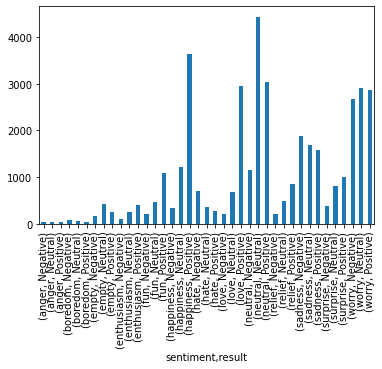

In [ ]:
df.groupby(['sentiment','result']).size().plot(kind='bar')

In [ ]:
df['clean_text'] = df['content'].apply(nfx.remove_stopwords)

In [ ]:
df['clean_text'] = df['clean_text'].apply(nfx.remove_userhandles)

In [ ]:
df['clean_text'] = df['clean_text'].apply(nfx.remove_punctuations)

In [ ]:
df[['content','clean_text']]

,content,clean_text
0,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started frea...
1,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,wants hang friends SOON
4,@dannycastillo We want to trade with someone w...,want trade Houston tickets will
...,...,...
39995,@JohnLloydTaylor,
39996,Happy Mothers Day All my love,Happy Mothers Day love
39997,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day mommies there woman man long...
39998,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [ ]:
# example for cleaning text
df['content'][0]

'@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =['

In [ ]:
df['clean_text'][0]

'  know listenin bad habit earlier started freakin =['

### keyboard extarction
extract most commonset words per class of emotions

In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num = 50):
  tokens = [ tok for tok in text.split() ]
  most_comon_token = Counter(tokens).most_common(num)
  return dict(most_comon_token)

In [ ]:
emotion_list = df['sentiment'].unique().tolist()

In [ ]:
emotion_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger']

In [ ]:
fun_list = df[df['sentiment'] == 'fun']['clean_text'].tolist()

In [ ]:
fun_docs = ' '.join(fun_list)

In [ ]:
fun_docs

'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore   lt3 gonna twitter ) cause amazing lol come canada perform RIP leonardo great mini fiddler crab   out memo looks amazing   OMG Ur alive LOL 2day gone sooo slow Im going insane Grrr tonight   california vintage ahahah BEST dresses want dont ebay (    Umm yeah Thats probably pretty good note self eeeeeewwwwwwww   Thats awesome weekend cant Im moving Sat lot fun finished im not color drawing come   Lettuce amp spinach best cool weather live floridanot luck growing those   know enjoy watching twitter entertaining comic miss BFF rocking Hotel California now   songs stay same Whats next Hmmm Careless whisper   dissapointment hhaha creeped ice cream social good times lars real girl sad movie playing street fighter IV Seth Raped clear DVR getting rid tomorrw   hell yeah missed u nite lol u like opinion wish   burning trees trying dresses spent 2 hours playing TF2 think Im better started unn

In [ ]:
keyword_fun = extract_keywords(fun_docs)

In [ ]:
keyword_fun

{'2': 42,
 'Ill': 37,
 'Im': 119,
 'Ive': 29,
 'LOL': 36,
 'amp': 58,
 'better': 30,
 'cant': 51,
 'come': 29,
 'cool': 30,
 'day': 84,
 'fun': 128,
 'funny': 39,
 'getting': 28,
 'going': 73,
 'gonna': 38,
 'good': 90,
 'got': 65,
 'great': 47,
 'haha': 83,
 'home': 33,
 'im': 71,
 'it': 53,
 'know': 54,
 'like': 100,
 'lol': 123,
 'look': 33,
 'love': 44,
 'me': 33,
 'morning': 28,
 'new': 40,
 'nice': 35,
 'night': 58,
 'now': 33,
 'right': 42,
 'sleep': 29,
 'thats': 34,
 'think': 59,
 'time': 51,
 'today': 56,
 'tomorrow': 41,
 'tonight': 46,
 'u': 71,
 'wait': 43,
 'want': 43,
 'way': 29,
 'week': 30,
 'work': 39,
 'yeah': 35,
 'you': 29}

In [ ]:
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(mydict.items(),columns = ['token','count'])
  plt.figure(figsize = (20,10))
  sns.barplot(x='token',y = 'count',data= df_01)
  plt.xticks(rotation = 45)
  plt.show()

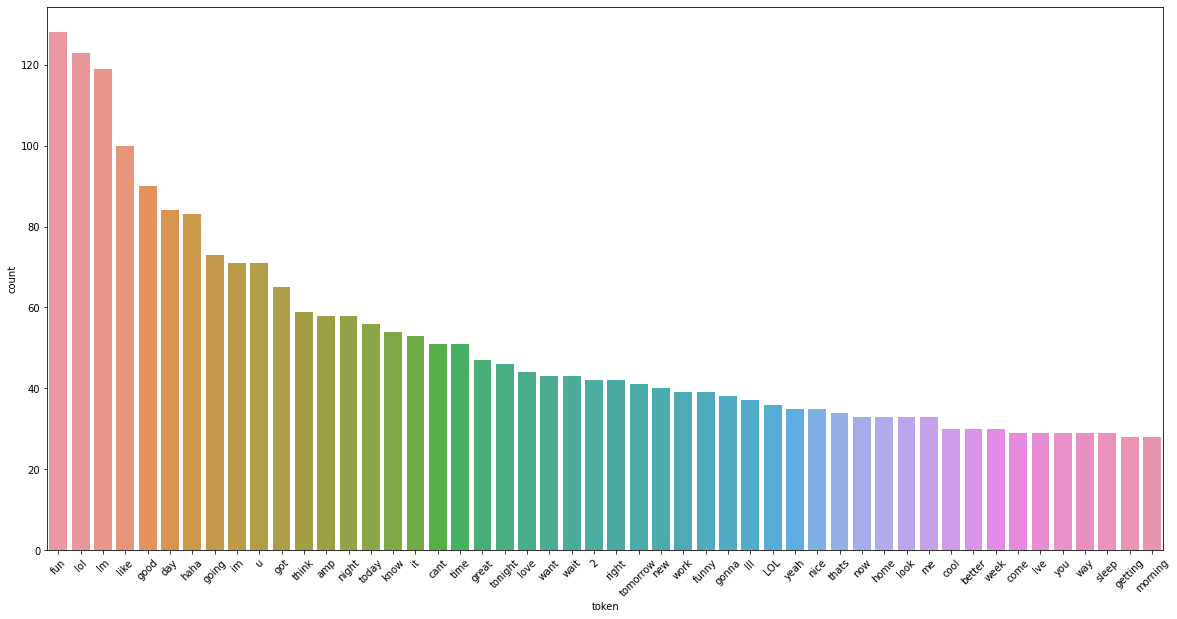

In [ ]:
plot_most_common_words(keyword_fun)

In [ ]:
surprise_list = df[df['sentiment'] == 'surprise']['clean_text'].tolist()
surprise_docx = ' '.join(surprise_list) 
keyword_surprise = extract_keywords(surprise_docx)

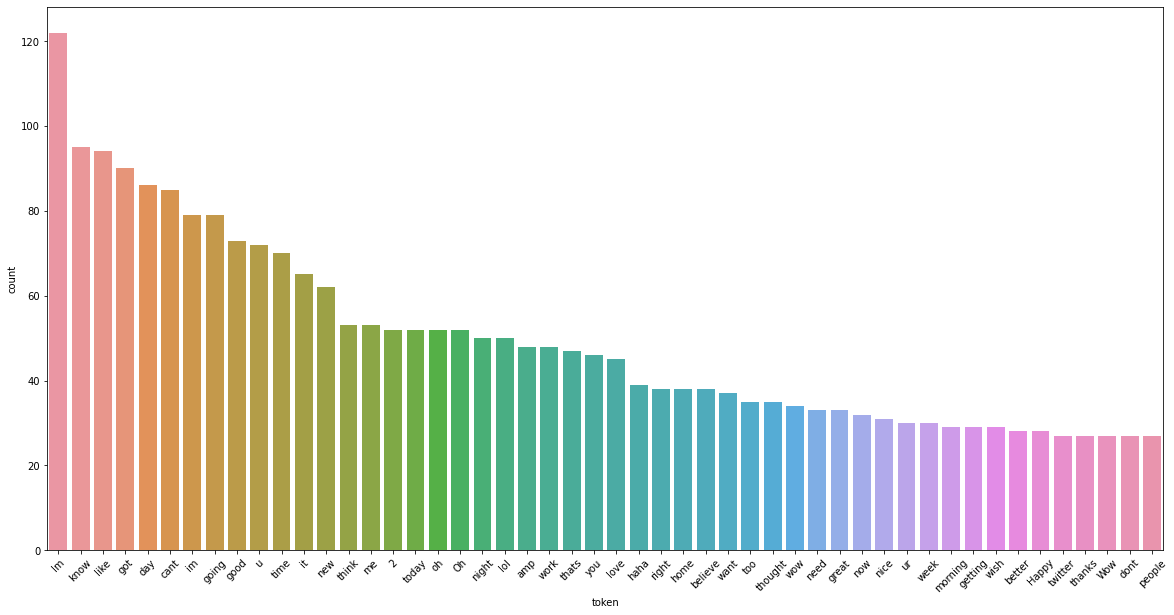

In [ ]:
plot_most_common_words(keyword_surprise)

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

machine learning

In [ ]:
# Load ML pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix



In [ ]:
from sklearn.model_selection import train_test_split

Build Feature From Our Test

In [ ]:
Xfeatures = df['clean_text']
Ylabel = df['sentiment']

In [ ]:
Xfeatures

0          know listenin bad habit earlier started frea...
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                  wants hang friends SOON
4                          want trade Houston tickets will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: clean_text, Length: 40000, dtype: object

In [ ]:
# vectorize
cv = CountVectorizer()
print(Xfeatures.dtype)
X = cv.fit_transform(Xfeatures)

object


In [ ]:
cv.get_feature_names()

['00',
 '000',
 '002',
 '006',
 '00am',
 '00pm',
 '01',
 '010',
 '02',
 '023',
 '024',
 '0255',
 '02mxjj',
 '03',
 '04',
 '04182012154',
 '05',
 '050',
 '050809',
 '053agj',
 '05ixbj',
 '06',
 '0600',
 '06am',
 '07',
 '0783l',
 '079ï',
 '07am',
 '07i',
 '07jzs',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kbr',
 '07kjr',
 '07xfs',
 '07xoh',
 '07xoi',
 '07yez',
 '08',
 '080509',
 '080809',
 '08kaifj',
 '09',
 '0930',
 '097dfj',
 '0a7v3j',
 '0ayzyj',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0kenjoy',
 '0l2tsj',
 '0ltrdaj',
 '0mqko',
 '0n',
 '0o',
 '0quot',
 '0rpm',
 '0s',
 '0t2b6j',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '0xoxij',
 '0zr2jqj',
 '0zywwj',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10000000000',
 '100000000000000000000000000000000000',
 '10000th',
 '1000th',
 '1000x',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011',
 '1011pm',
 '1012',
 '1015',
 '1017',
 '102',
 '1027',
 '1029',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1034415'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Ylabel,test_size=0.2,random_state = 42)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 40000
Number of rows in the training set: 32000
Number of rows in the test set: 8000


Build Our Model

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
score = nv_model.score(X_test,y_test)
predictions = nv_model.predict(X)
print(predictions)

['worry' 'worry' 'sadness' ... 'love' 'happiness' 'love']


In [ ]:
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print('Accuracy score: ', accuracy_score(y_test, y_pred_for_nv))

Accuracy score:  0.31625


### try to change dataset for better resuls

# make a single prediction
vectorize our text

applied our model

In [ ]:
sample_text = ["I love coding very much"]

In [ ]:
vect = cv.transform(sample_text).toarray()

In [ ]:
nv_model.predict(vect)

array(['love'], dtype='<U10')

In [ ]:
# check for the prediction probability
nv_model.predict_proba(vect)

array([[7.36674641e-06, 4.60086362e-05, 2.07848254e-04, 2.71504076e-04,
        6.42813267e-03, 3.78944994e-02, 1.49408314e-03, 4.63897906e-01,
        1.51113481e-01, 2.44338891e-03, 7.29516340e-02, 9.29830779e-03,
        2.53945840e-01]])

In [ ]:
nv_model.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.463897905829476

In [ ]:
def predict_emotion(sample_text,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
  print(prediction[0])
  # print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
  return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text,nv_model)

love


{'anger': 7.36674641100431e-06,
 'boredom': 4.600863622032985e-05,
 'empty': 0.00020784825426695084,
 'enthusiasm': 0.00027150407557332434,
 'fun': 0.0064281326708599375,
 'happiness': 0.03789449935884739,
 'hate': 0.0014940831390281085,
 'love': 0.463897905829476,
 'neutral': 0.15111348068778555,
 'relief': 0.002443388905389066,
 'sadness': 0.07295163401527655,
 'surprise': 0.009298307789736277,
 'worry': 0.2539458398911315}

In [ ]:
predict_emotion(["He hates running all day"],nv_model)

worry


{'anger': 4.199952692015537e-07,
 'boredom': 2.5964434605071296e-06,
 'empty': 7.378052690269558e-05,
 'enthusiasm': 9.302845164085375e-05,
 'fun': 0.0013618592093843796,
 'happiness': 0.017346818025539498,
 'hate': 0.005754728079971083,
 'love': 0.03199626521936704,
 'neutral': 0.1332410509113612,
 'relief': 0.0016010020551049276,
 'sadness': 0.3160187559633912,
 'surprise': 0.007945456947991397,
 'worry': 0.4845642381706145}

Model Evaluation

In [ ]:
# classification
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.20      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.32      0.34      0.33      1028
        hate       0.38      0.02      0.04       268
        love       0.46      0.32      0.38       762
     neutral       0.34      0.40      0.37      1740
      relief       0.00      0.00      0.00       352
     sadness       0.31      0.16      0.21      1046
    surprise       0.17      0.01      0.02       425
       worry       0.28      0.64      0.39      1666

    accuracy                           0.32      8000
   macro avg       0.19      0.15      0.13      8000
weighted avg       0.28      0.32      0.27      8000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confision
confusion_matrix(y_test,y_pred_for_nv)

array([[   0,    0,    0,    0,    0,    2,    0,    0,    5,    0,    3,
           0,    9],
       [   0,    0,    0,    0,    0,    0,    0,    1,    6,    0,    3,
           0,   21],
       [   0,    0,    1,    0,    0,   13,    0,    2,   65,    0,   11,
           0,   70],
       [   0,    0,    0,    0,    0,   28,    0,    3,   51,    0,    8,
           0,   73],
       [   0,    0,    0,    0,    0,   81,    0,   18,   93,    0,   18,
           0,  128],
       [   0,    0,    0,    0,    3,  347,    0,   95,  252,    1,   24,
           3,  303],
       [   0,    0,    0,    0,    0,    8,    5,    3,   53,    0,   37,
           2,  160],
       [   0,    0,    0,    0,    0,  179,    0,  241,  132,    0,   34,
           2,  174],
       [   0,    0,    2,    0,    2,  164,    2,   63,  701,    1,   73,
           3,  729],
       [   0,    0,    0,    0,    0,   65,    0,   20,   91,    0,   23,
           0,  153],
       [   0,    0,    1,    0,    0,   48,    0, 

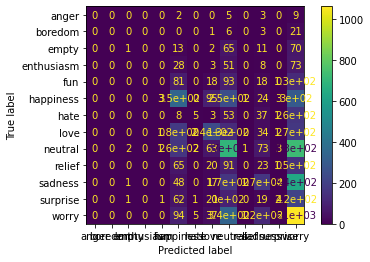

In [ ]:
# plot confusion Matrix
plot_confusion_matrix(nv_model,X_test,y_test)

In [ ]:
import joblib

In [ ]:
#Save Model
model_file = open("emotion_classifier_nv_model","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_model.score(X_test,y_test)

0.3325

In [ ]:
predict_emotion(sample_text,lr_model)

love


{'anger': 0.002251001380281166,
 'boredom': 0.00811583050120566,
 'empty': 0.011732307650090907,
 'enthusiasm': 0.005408424811104046,
 'fun': 0.036369571469743914,
 'happiness': 0.05890091850790063,
 'hate': 0.015254648421116537,
 'love': 0.4125110621150023,
 'neutral': 0.13651941799125386,
 'relief': 0.018177015902614623,
 'sadness': 0.10478170928427716,
 'surprise': 0.06743880254670553,
 'worry': 0.12253928941870361}

In [ ]:
# remove neutral emotions from df
new_df = df[df['sentiment'] != 'neutral']
new_df = new_df[new_df['sentiment'] != 'empty']
new_df = new_df[new_df['sentiment'] != 'enthusiasm']
new_df = new_df[new_df['sentiment'] != 'boredom']
new_df = new_df[new_df['sentiment'] != 'anger']
new_df = new_df[new_df['sentiment'] != 'fun']
new_df = new_df[new_df['sentiment'] != 'relief']
new_df = new_df[new_df['sentiment'] != 'hate']

In [ ]:
new_df.isnull().sum()

tweet_id      0
sentiment     0
content       0
result        0
size          0
clean_text    0
dtype: int64

In [ ]:
new_df

,tweet_id,sentiment,content,result,size,clean_text
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral,1696,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,1696,Funeral ceremonygloomy friday
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,Neutral,2917,Repinging prom BC bf like friends
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",Positive,1583,sleep im not thinking old friend want hes marr...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,Negative,2670,Hmmm http://wwwdjherocom/
...,...,...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,Neutral,1224,Succesfully following Tayla
39996,1753919001,love,Happy Mothers Day All my love,Positive,2944,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive,2944,Happy Mothers Day mommies there woman man long...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,Positive,3640,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...


In [ ]:
new_df.shape

(24862, 6)

In [ ]:
new_df["sentiment"].value_counts()

worry        8459
happiness    5209
sadness      5165
love         3842
surprise     2187
Name: sentiment, dtype: int64

In [ ]:
Xfeatures1 = new_df['clean_text']
Ylabel1 = new_df['sentiment']

In [ ]:
Xfeatures1

1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
5                      Repinging   prom BC bf like friends
6        sleep im not thinking old friend want hes marr...
7                                Hmmm http://wwwdjherocom/
                               ...                        
39994                          Succesfully following Tayla
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
39999      bullet train tokyo gf visiting japan thursda...
Name: clean_text, Length: 24862, dtype: object

In [ ]:
Ylabel1

1          sadness
2          sadness
5            worry
6          sadness
7            worry
           ...    
39994    happiness
39996         love
39997         love
39998    happiness
39999         love
Name: sentiment, Length: 24862, dtype: object

In [ ]:
cv1 = CountVectorizer()
X1 = cv1.fit_transform(Xfeatures1)

In [ ]:
cv1.get_feature_names()

['00',
 '000',
 '006',
 '00am',
 '01',
 '024',
 '03',
 '04',
 '04182012154',
 '05',
 '06',
 '0600',
 '06am',
 '07',
 '079ï',
 '07k6e',
 '07k6x',
 '07kbp',
 '07kbq',
 '07kjr',
 '07xfs',
 '07xoh',
 '07yez',
 '08',
 '08kaifj',
 '09',
 '0930',
 '0a7v3j',
 '0egwanj',
 '0f',
 '0gmunj',
 '0guyoj',
 '0l2tsj',
 '0mqko',
 '0n',
 '0o',
 '0s',
 '0ut',
 '0wvnpj',
 '0xhu5j',
 '10',
 '100',
 '1000',
 '10000',
 '100000000000000000000000000000000000',
 '10000th',
 '1008',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '1011pm',
 '1012',
 '1017',
 '102',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '103ffevered',
 '104',
 '1045',
 '104m6wj',
 '105',
 '1052x1',
 '106',
 '1073',
 '108',
 '109',
 '1095',
 '10am',
 '10and',
 '10dolla',
 '10gb',
 '10jaffa',
 '10k',
 '10m',
 '10mm',
 '10p',
 '10pm',
 '10th',
 '10ty',
 '10uemq',
 '10yr',
 '11',
 '110',
 '1102',
 '111',
 '1115',
 '1116',
 '1123',
 '113',
 '114',
 '1140',
 '115',
 '116',
 '11830',
 '118lgl',
 '11am',
 '11dd2t',
 '11p

In [ ]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,Ylabel1,test_size=0.3,random_state = 42)

In [ ]:
nv_model1 = MultinomialNB()
nv_model1.fit(X_train1,y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nv_model1.score(X_test1,y_test1)

0.44697680654243194

In [ ]:
y_pred_for_nv = nv_model1.predict(X_test1)

In [ ]:
nv_model1.classes_

array(['happiness', 'love', 'sadness', 'surprise', 'worry'], dtype='<U9')

In [ ]:
#! pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1krB8yMWqouP1vY0FzO_4pu6FJDZ96we4'
output = 'emotion_dataset_2.csv'

gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1krB8yMWqouP1vY0FzO_4pu6FJDZ96we4
To: /content/emotion_dataset_2.csv
5.31MB [00:00, 209MB/s]


'emotion_dataset_2.csv'

In [ ]:
import pandas as pd
data2 = pd.read_csv('emotion_dataset_2.csv')
data2

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
data2.shape

(34792, 4)

In [ ]:
data2 = data2[['Emotion','Text','Clean_Text']]

In [ ]:
data2.shape

(34792, 3)

In [ ]:
emotion_list = data2['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
data2["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
X2 = data2["Clean_Text"]
y2 = data2["Emotion"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

print('Number of rows in the total set: {}'.format(data2.shape[0]))
print('Number of rows in the training set: {}'.format(X_train2.shape[0]))
print('Number of rows in the test set: {}'.format(X_test2.shape[0]))


Number of rows in the total set: 34792
Number of rows in the training set: 26094
Number of rows in the test set: 8698


In [ ]:
import numpy as np
#(X_train).apply(lambda x: np.str_(x))
cv2 = CountVectorizer()
X_train_cv2 = cv2.fit_transform((X_train2).apply(lambda x: np.str_(x)))
X_test_cv2 = cv2.transform((X_test2).apply(lambda x: np.str_(x)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
nv2Model = MultinomialNB()
nv2Model.fit(X_train_cv2,y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions = nv2Model.predict(X_test_cv2)

In [ ]:
# nv2Model.score(X_test2,y_test2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test2, predictions)))

Accuracy score:  0.5841572775350655
